<h1 style="text-align:center;">----- EDA -----</h1>

- Preparación del entorno para realización de análisis y visualización de datos usando Python y sus bibliotecas correspondientes.

In [1]:
import matplotlib
matplotlib.use('TkAgg')  
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from wordcloud import WordCloud
%matplotlib inline  
from scipy import stats
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

- Se procede a leer el dataset de la base de datos a partir de un archivo .parquet para trabajarlo como un dataframe

In [2]:
# Leer un archivo .parquet
st_eda = pd.read_parquet('streaming.parquet')

In [3]:
st_eda

,id,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,cast,crew
0,211672,Despicable Me Collection,74000000,"[Family, Animation, Adventure, Comedy]",en,"Minions Stuart, Kevin and Bob are recruited by...",547.488298,"[Universal Pictures, Illumination Entertainment]",[United States of America],2015-06-17,...,[English],Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4729,2015,15.631499,"[Sandra Bullock, Jon Hamm, Michael Keaton, All...","[Kyle Balda, Pierre Coffin]"
1,297762,Wonder Woman Collection,149000000,"[Action, Adventure, Fantasy]",en,An Amazon princess comes to the world of Man t...,294.337037,"[Dune Entertainment, Atlas Entertainment, Warn...",[United States of America],2017-05-30,...,"[Deutsch, English]",Released,Power. Grace. Wisdom. Wonder.,Wonder Woman,7.2,5025,2017,5.507251,"[Gal Gadot, Chris Pine, Robin Wright, Danny Hu...",[Patty Jenkins]
2,321612,,160000000,"[Family, Fantasy, Romance]",en,A live-action adaptation of Disney's version o...,287.253654,"[Walt Disney Pictures, Mandeville Films]","[United Kingdom, United States of America]",2017-03-16,...,[English],Released,Be our guest.,Beauty and the Beast,6.8,5530,2017,7.893040,"[Emma Watson, Dan Stevens, Luke Evans, Kevin K...",[Bill Condon]
3,339403,,34000000,"[Action, Crime]",en,After being coerced into working for a crime b...,228.032744,"[Big Talk Productions, TriStar Pictures, Media...","[United Kingdom, United States of America]",2017-06-28,...,[English],Released,All you need is one killer track.,Baby Driver,7.2,2083,2017,6.603274,"[Ansel Elgort, Lily James, Kevin Spacey, Jamie...",[Edgar Wright]
4,177572,,165000000,"[Adventure, Family, Animation, Action, Comedy]",en,The special bond that develops between plus-si...,213.849907,"[Walt Disney Pictures, Walt Disney Animation S...",[United States of America],2014-10-24,...,[English],Released,From the creators of Wreck-it Ralph and Frozen,Big Hero 6,7.8,6289,2014,3.952154,"[Scott Adsit, Ryan Potter, Daniel Henney, T.J....","[Chris Williams, Don Hall]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45019,389854,,0,[],en,Directed by,0.000000,[],[],1989-03-25,...,[],Released,nan,The Last Ferry,0.0,0,1989,0.000000,[],[Waldemar Krzystek]
45020,317965,,0,[],it,A young shy man (Tommaso) runs down a blond gi...,0.000000,[],[],1993-03-12,...,[],Released,nan,La Bionda,0.0,0,1993,0.000000,"[Nastassja Kinski, Sergio Rubini]",[Sergio Rubini]
45021,315256,,0,[Horror],hi,"Dr. Vishal, a mad scientist, turns into a bloo...",0.000000,[Ramsay Productions],[India],1981-06-19,...,[हिन्दी],Released,nan,Terror,0.0,0,1981,0.000000,"[Navin Nischol, Sarika]","[Shyam Ramsay, Tulsi Ramsay]"
45022,293552,,0,[],en,This moving documentary recounts the two month...,0.000000,[],[],1993-01-01,...,[],Released,nan,At the River I Stand,0.0,0,1993,0.000000,[],[]


In [4]:
st_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45024 entries, 0 to 45023
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45024 non-null  int64         
 1   belongs_to_collection  45024 non-null  object        
 2   budget                 45024 non-null  int64         
 3   genres                 45024 non-null  object        
 4   original_language      45024 non-null  object        
 5   overview               45024 non-null  object        
 6   popularity             45024 non-null  float64       
 7   production_companies   45024 non-null  object        
 8   production_countries   45024 non-null  object        
 9   release_date           45024 non-null  datetime64[ns]
 10  revenue                45024 non-null  int64         
 11  runtime                45024 non-null  int64         
 12  spoken_languages       45024 non-null  object        
 13  s

- Con esta función check_nul, se revisa la existencia de valores nulos de un dataframe, proporcionando información sobre la columna que tiene los datos faltantes.

In [5]:
def check_nul():
    dfcol = st_eda.columns.tolist()
    temp_l = []
    problemas = False
    for element in dfcol:
        num_val = st_eda[element].isna().sum()
        if num_val != 0:
            print(f"Hay {num_val} valores nulos en la columna {element}")
            temp_l.append(element)
            problemas = True

    dfcol = st_eda[temp_l]

    for col in dfcol.columns:
        if pd.api.types.is_numeric_dtype(st_eda[col]):
            print(f"'{col}' es una columna con datos numericos")
        elif pd.api.types.is_string_dtype(st_eda[col]):
            print(f"'{col}' es una columna con datos de texto")
        elif pd.api.types.is_datetime64_any_dtype(st_eda[col]):
            print(f"'{col}' es una columna con datos de fecha")
        else:
            print(f"'{col}' es una columna con datos iterables")

    if problemas == False: print('Datos sin problemas')

In [6]:
check_nul()

Datos sin problemas


-  Se procede a encontrar los índices de las filas en el dataframe donde los campos de esa fila estén vacíos

In [7]:
belongs_to_collection_na = st_eda[st_eda['belongs_to_collection'].isna()].index.tolist()
original_language_na = st_eda[st_eda['original_language'].isna()].index.tolist()
overview_na = st_eda[st_eda['overview'].isna()].index.tolist()
tagline_na = st_eda[st_eda['tagline'].isna()].index.tolist()

print(f"{belongs_to_collection_na}")
print(f"{original_language_na}")
print(f"{overview_na}")
print(f"{tagline_na}")

[]
[]
[]
[]


- Este script realiza un análisis y visualización de la distribución de géneros en un conjunto de datos, permitiendo entender mejor la composición de los datos y facilitando el análisis exploratorio. 


El 69.07% de los datos de este subset tiene 2 o menos géneros, y el 37.06% tiene menos de 2. Se asume que los géneros son importantes para el sistema de recomendación.


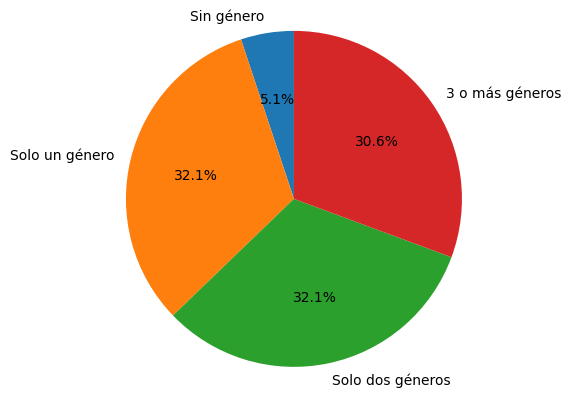

In [8]:
# Contar géneros
genre_counts = st_eda['genres'].apply(len).value_counts()

# Asignar valores a las variables
ob_gen_nul = genre_counts.get(0, 0)
ob_gen_1 = genre_counts.get(1, 0)
ob_gen_2 = genre_counts.get(2, 0)
ob_gen_3 = genre_counts.get(3, 0) + genre_counts.get(4, 0) + genre_counts.get(5, 0)  # Sumar todos los géneros 3 o más
ob_tot = st_eda.shape[0]

# Etiquetas y tamaños para el gráfico
labels = ['Sin género', 'Solo un género', 'Solo dos géneros', '3 o más géneros']
sizes = [ob_gen_nul, ob_gen_1, ob_gen_2, ob_gen_3]

# Crear gráfico de pastel
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Imprimir resultados
porcentaje_dos_o_menos = round(((ob_gen_nul + ob_gen_1 + ob_gen_2) / ob_tot) * 100, 2)
porcentaje_menos_de_dos = round(((ob_gen_nul + ob_gen_1) / ob_tot) * 100, 2)
print(f'El {porcentaje_dos_o_menos}% de los datos de este subset tiene 2 o menos géneros, y el {porcentaje_menos_de_dos}% tiene menos de 2. Se asume que los géneros son importantes para el sistema de recomendación.')

- Este script es útil para obtener estadísticas descriptivas de un conjunto de datos de películas, permitiendo analizar valoraciones y la presencia de información sobre el equipo de producción y el reparto. Al analizar estos datos se pueden tomar decisiones informadas sobre la calidad y la completitud de la información disponible en el conjunto de datos.

In [9]:
v_avg = round(st_eda['vote_average'].mean(), 2)
v_cnt = round(st_eda['vote_count'].mean(), 2)
v_cnt_m = round(st_eda['vote_count'].max(), 2)
crew_e = st_eda['crew'].apply(lambda x: len(x) == 0).sum()
cast_e = st_eda['cast'].apply(lambda x: len(x) == 0).sum()
crew_e

print(f'De este subset de peliculas podemos obtener estos datos:\nLa valoracion promedio de las peliculas es de {v_avg}\nLa cantidad de valoraciones promedio es de {v_cnt}\n\nPor todo esto se considera que los datos no son valiosos para el sistema de recomendacion\n')
print(f'Ademas, de los datos {ob_tot-cast_e} contienen info de los actores y {ob_tot-crew_e} de los directores, por lo que tampoco se determinan utiles para las funciones.')

De este subset de peliculas podemos obtener estos datos:
La valoracion promedio de las peliculas es de 5.64
La cantidad de valoraciones promedio es de 110.9

Por todo esto se considera que los datos no son valiosos para el sistema de recomendacion

Ademas, de los datos 42727 contienen info de los actores y 44241 de los directores, por lo que tampoco se determinan utiles para las funciones.


- La función analyze_movie_dataset toma el DataFrame de películas (st_eda) y calcula varias estadísticas descriptivas sobre las calificaciones y la información disponible del equipo de trabajo y el reparto. Luego imprime un resumen del análisis, proporcionando información valiosa sobre el dataset.

In [10]:
def analyze_movie_dataset(dataset):
    """
    Analiza estadísticamente un conjunto de datos de películas.
    
    Argumento:
        dataset (pd.st_eda): Dataset de películas para analizar
    
    Returns:
        dict: Diccionario con estadísticas del dataset st_eda
    """
    stats = {
        'avg_vote': round(dataset['vote_average'].mean(), 2),
        'avg_vote_count': round(dataset['vote_count'].mean(), 2),
        'max_vote_count': round(dataset['vote_count'].max(), 2),
        'empty_crew': dataset['crew'].apply(lambda x: len(x) == 0).sum(),
        'empty_cast': dataset['cast'].apply(lambda x: len(x) == 0).sum()
    }
    
    total_movies = len(dataset)
    
    print(f"Análisis del dataset:")
    print(f"- Calificación promedio de películas: {stats['avg_vote']}")
    print(f"- Recuento promedio de votos: {stats['avg_vote_count']}")
    print(f"- Recuento total de votos: {stats['max_vote_count']}")
    print(f"- Películas con información del equipo de trabajo: {total_movies - stats['empty_crew']}")
    print(f"- Películas con información del reparto: {total_movies - stats['empty_cast']}")

In [11]:
analyze_movie_dataset(st_eda) # Llamada a la función

Análisis del dataset:
- Calificación promedio de películas: 5.64
- Recuento promedio de votos: 110.9
- Recuento total de votos: 14075
- Películas con información del equipo de trabajo: 44241
- Películas con información del reparto: 42727


- Este código recorre cada columna del DataFrame st_eda y determina si los datos en la columna son numéricos o de tipo fecha. 

In [12]:
for col in st_eda.columns:
    if pd.api.types.is_numeric_dtype(st_eda[col]):
        print(f"'{col}' es una columna con datos numericos")
    elif pd.api.types.is_datetime64_any_dtype(st_eda[col]):
        print(f"'{col}' es una columna con datos de fecha")

'id' es una columna con datos numericos
'budget' es una columna con datos numericos
'popularity' es una columna con datos numericos
'release_date' es una columna con datos de fecha
'revenue' es una columna con datos numericos
'runtime' es una columna con datos numericos
'vote_average' es una columna con datos numericos
'vote_count' es una columna con datos numericos
'release_year' es una columna con datos numericos
'return' es una columna con datos numericos


- Se procede a identificar y analizar valores atípicos (outliers) en st_eda, lo cual es crucial para la limpieza y el análisis de datos en proyectos de ciencia de datos. Los valores atípicos pueden distorsionar los resultados de análisis estadísticos y modelos predictivos, por lo que identificarlos y entender su impacto es una parte importante del proceso de análisis de datos.

In [13]:
z_scores = stats.zscore(st_eda['return'])
outliers = st_eda[(z_scores > 3) | (z_scores < -3)]
outliers[['title', 'budget', 'revenue', 'return']].sort_values(by='budget')

,title,budget,revenue,return
4704,Modern Times,1,8500000,8.500000e+06
10739,Less Than Zero,1,12396383,1.239638e+07
36913,Aquí Entre Nos,1,2755584,2.755584e+06
10422,Welcome to Dongmakgol,8,33579813,4.197477e+06
8823,Nurse 3-D,10,10000000,1.000000e+06
3662,"The Karate Kid, Part II",113,115103979,1.018619e+06


- Se han identificado valores atípicos (outliers) en el DataFrame outliers y se desea modificar ciertos valores (en este caso, budget y return) en el DataFrame original (st_eda), se reemplazan valores atípicos por valores predeterminados (como 0) para evitar que distorsionen los análisis posteriores.

In [14]:
lis_outl = outliers.index.tolist()
st_eda.loc[lis_outl, ['budget', 'return']] = [0, 0]

In [15]:
z_scores = stats.zscore(st_eda['return'])
outliers = st_eda[(z_scores > 3) | (z_scores < -3)]
outliers[['title', 'budget', 'revenue', 'return']].sort_values(by='budget')

,title,budget,revenue,return
10689,"Love, Wedding, Marriage",1,1378,1378.000000
2242,From Prada to Nada,93,2500000,26881.720430
18568,Tarnation,218,1162014,5330.339450
11835,The Tiger: An Old Hunter's Tale,5000,11083449,2216.689800
5040,Eraserhead,10000,7000000,700.000000
7951,Pink Flamingos,12000,6000000,500.000000
1386,Paranormal Activity,15000,193355800,12890.386667
749,The Blair Witch Project,60000,248000000,4133.333333
8707,Super Size Me,65000,28575078,439.616585
2223,The Way of the Dragon,130000,85000000,653.846154


- Se identifica que existen ahora 3 producciones que pueden ser eliminadas, debido a que el presupuesto que aparece en la tabla con respecto a la recaudación de dinero por vista de parte de la audiencia parece ser un error en la ingesta de los datos, por lo que se decide no eliminar estos datos, sino, dejar estos datos en 0.

In [16]:
st_eda.loc[[10689,2242,18568],['budget','return']] = [0, 0]

- Verificamos nuevamente los datos después del cambio

In [17]:
z_scores = stats.zscore(st_eda['return'])
outliers = st_eda[(z_scores > 3) | (z_scores < -3)]
outliers[['title', 'budget', 'revenue', 'return']].sort_values(by='budget')

,title,budget,revenue,return
11835,The Tiger: An Old Hunter's Tale,5000,11083449,2216.689800
5040,Eraserhead,10000,7000000,700.000000
7951,Pink Flamingos,12000,6000000,500.000000
1386,Paranormal Activity,15000,193355800,12890.386667
749,The Blair Witch Project,60000,248000000,4133.333333
8707,Super Size Me,65000,28575078,439.616585
630,The Texas Chain Saw Massacre,85000,30859000,363.047059
19241,The Legend of Boggy Creek,100000,22000000,220.000000
5468,The Gallows,100000,42664410,426.644100
852,Night of the Living Dead,114000,30000000,263.157895


- Se aplica una fórmula que permite identificar los registros donde el presupuesto de la producción cinematrográfica sea diferente de cero y un presupuesto menor a 100 dolares.

In [18]:
z_scores = stats.zscore(st_eda['return'])
outliers = st_eda[st_eda['budget'].apply(lambda x: x != 0 and x < 100)]
otl = outliers.index.tolist()
outliers[['title', 'budget', 'revenue', 'return']].sort_values(by='return', ascending=False)

,title,budget,revenue,return
20670,Lost & Found,1,100,100.000000
44964,Falling From Grace,3,232,77.333333
44211,The Cherry Orchard,5,135,27.000000
6429,Every Which Way But Loose,5,85,17.000000
12124,Boy,3,43,14.333333
...,...,...,...,...
43421,To.get.her,86,0,0.000000
43844,Bigfoot Lives,35,0,0.000000
43533,Pond Hockey,75,0,0.000000
44071,Toy Reanimator,60,0,0.000000


- Estos valores se identifican como registros errónos y para estandarizar la información se procede a igualar esas columnas de 'budget' y 'return' a cero.

In [19]:
st_eda.loc[otl, ['budget', 'return']] = [0, 0]

In [20]:
st_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45024 entries, 0 to 45023
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45024 non-null  int64         
 1   belongs_to_collection  45024 non-null  object        
 2   budget                 45024 non-null  int64         
 3   genres                 45024 non-null  object        
 4   original_language      45024 non-null  object        
 5   overview               45024 non-null  object        
 6   popularity             45024 non-null  float64       
 7   production_companies   45024 non-null  object        
 8   production_countries   45024 non-null  object        
 9   release_date           45024 non-null  datetime64[ns]
 10  revenue                45024 non-null  int64         
 11  runtime                45024 non-null  int64         
 12  spoken_languages       45024 non-null  object        
 13  s

- Se termina de identificar valores atipicos que permiten realizar un sistema de recomendación adecuado, se procede a exportar y guardar los datos en un archivo .parquet para su uso posterior

In [21]:
parquet_filename = 'streaming_eda.parquet'
table = pa.Table.from_pandas(st_eda)
pq.write_table(table, parquet_filename)

<h1 style="text-align:center;">----- SISTEMA DE RECOMENDACIÓN -----</h1>

- Importación de archivo .parquet de dataset para entrenamiento del sistema de recomendación

In [22]:
parquet_file = "streaming_eda.parquet"
st_recom = pd.read_parquet(parquet_file)

In [23]:
st_recom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45024 entries, 0 to 45023
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45024 non-null  int64         
 1   belongs_to_collection  45024 non-null  object        
 2   budget                 45024 non-null  int64         
 3   genres                 45024 non-null  object        
 4   original_language      45024 non-null  object        
 5   overview               45024 non-null  object        
 6   popularity             45024 non-null  float64       
 7   production_companies   45024 non-null  object        
 8   production_countries   45024 non-null  object        
 9   release_date           45024 non-null  datetime64[ns]
 10  revenue                45024 non-null  int64         
 11  runtime                45024 non-null  int64         
 12  spoken_languages       45024 non-null  object        
 13  s

- Para tomar esta decisión se analiza y se identifica que algunas columnas no servirán para el propósito de la creación del modelo

# Columna 'budget'

El 80.62% de esta columna no contienen registros.


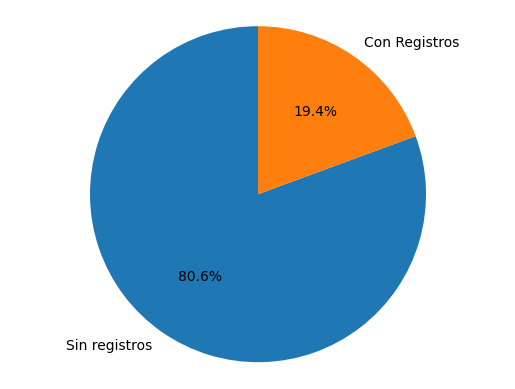

In [24]:
bud_gen_nul = st_recom['budget'].apply(lambda x: x == 0).sum()
bud_gen_1 = st_recom['budget'].apply(lambda x: x != 0).sum()
tot = st_recom.shape[0]
labels = 'Sin registros', 'Con Registros'
sizes = [bud_gen_nul, bud_gen_1]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

print(f'El {round((bud_gen_nul/tot)*100, 2)}% de esta columna no contienen registros.')

- Se elimina la columna 'Budget'

In [25]:
st_recom.drop('budget', axis=1, inplace=True)

# Columna 'Revenue'

El 83.59% de de esta columna no contienen registros.


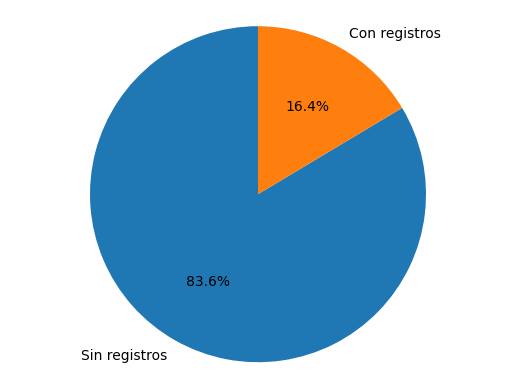

In [26]:
rev_gen_nul = st_recom['revenue'].apply(lambda x: x == 0).sum()
rev_gen_1 = st_recom['revenue'].apply(lambda x: x != 0).sum()
labels = 'Sin registros', 'Con registros'
sizes = [rev_gen_nul, rev_gen_1]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

print(f'El {round((rev_gen_nul/tot)*100, 2)}% de de esta columna no contienen registros.')

In [27]:
st_recom.drop('revenue', axis=1, inplace=True)

- Se elimina también la columna 'return', puesto que era el resultado entre la columna presupuesto (bufget) y la columna recaudación (revenue)

In [28]:
st_recom.drop('return', axis=1, inplace=True)

- La columna 'Tagline' practicamente no se usará puesto que la mayoría de las películas no tienen una tagline y las que sí tienen, están inclusas dentro de la columna 'overview', por lo que se procede a eliminar esta columna.

In [29]:
st_recom.drop('tagline', axis=1, inplace=True)

- Gráfica que muestra las palabras más usadas en la columna overview, y su frecuencia de aparición representada por tamaño.

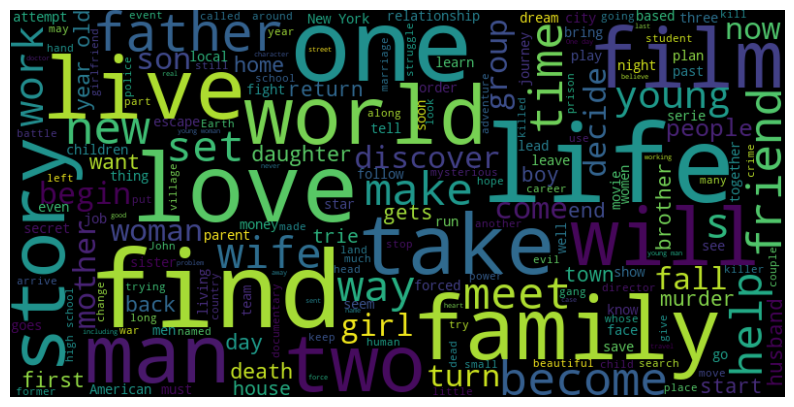

In [30]:
# Unir todos los textos de la columna 'overview' en un solo string
text = ' '.join(st_recom['overview'].astype(str))
text = text.replace("nan", "")

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, max_font_size=110).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
st_recom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45024 entries, 0 to 45023
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45024 non-null  int64         
 1   belongs_to_collection  45024 non-null  object        
 2   genres                 45024 non-null  object        
 3   original_language      45024 non-null  object        
 4   overview               45024 non-null  object        
 5   popularity             45024 non-null  float64       
 6   production_companies   45024 non-null  object        
 7   production_countries   45024 non-null  object        
 8   release_date           45024 non-null  datetime64[ns]
 9   runtime                45024 non-null  int64         
 10  spoken_languages       45024 non-null  object        
 11  status                 45024 non-null  object        
 12  title                  45024 non-null  object        
 13  v

- La columna de status tampoco será útil para el modelo de recomendación, ya que de base solo podremos recomendar las películas que tengas status de lanzadas o estrenadas, por lo que no tendremos en cuenta esta columna y se dejarán solo los registros donde la columna status sea igual a lanzada o estrenada.

In [32]:
st_recom.drop(st_recom[st_recom['status'] != 'Released'].index, inplace=True)
rel_tot = st_recom.shape[0]

print(f'Peliculas totales: {tot}')
print(f'Peliculas que no tengan un Status de Released: {tot-rel_tot}')
print(f'Peliculas finales en el Data Frame: {rel_tot}')

Peliculas totales: 45024
Peliculas que no tengan un Status de Released: 357
Peliculas finales en el Data Frame: 44667


In [33]:
st_recom.shape

(44667, 18)

In [34]:
st_recom.drop('status', axis=1, inplace=True)
st_recom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44667 entries, 0 to 45023
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44667 non-null  int64         
 1   belongs_to_collection  44667 non-null  object        
 2   genres                 44667 non-null  object        
 3   original_language      44667 non-null  object        
 4   overview               44667 non-null  object        
 5   popularity             44667 non-null  float64       
 6   production_companies   44667 non-null  object        
 7   production_countries   44667 non-null  object        
 8   release_date           44667 non-null  datetime64[ns]
 9   runtime                44667 non-null  int64         
 10  spoken_languages       44667 non-null  object        
 11  title                  44667 non-null  object        
 12  vote_average           44667 non-null  float64       
 13  vote_c

A continuación se definirán las columnas que se utilizarán para cumplir con el objetivo del proyecto, que es la creación de un sistema de recomendación de películas basado en el análisis del promedio de clasificación basada en el voto de los usuarios, se requieren 2 columnas para realizar el modelo: title como input para obtener un resultado y vote_average para el ordenamiento de películas de forma descendente.

Las columnas comparación para poder igualar dos películas o títulos son las siguientes: 
- genres: Por su característica a aprovechar como etiqueta.
- overview: Da una idea general de la trama de la película.
- production_companies: Existen compañías dedicadas exclusivamente a ciertos géneros del cine.
- production_countries: Según ciertas normas o idiosincrasia de un país, puede existir una preferencia por ciertos géneros.
- cast: Como pasa con el tema de las compañías, también hay directores que se especializan en ciertos géneros.
- crew: En ocasiones, debido a una experiencia en particular por la actuación de un actor, puede existir una preferencia por ciertos géneros.

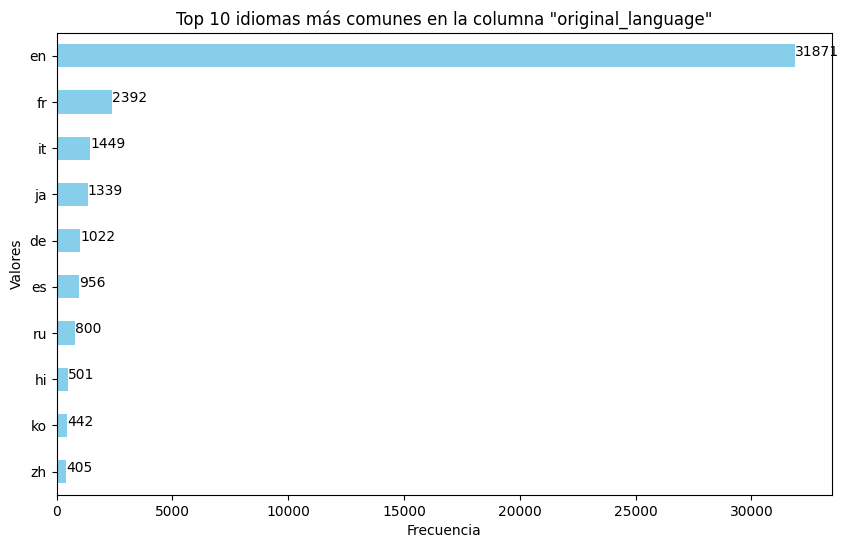

In [35]:
comm_lan = st_recom['original_language'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = comm_lan.plot(kind='barh', color='skyblue')

for index, value in enumerate(comm_lan):
    plt.text(value, index, str(value))

plt.xlabel('Frecuencia')
plt.ylabel('Valores')
plt.title('Top 10 idiomas más comunes en la columna "original_language"')
plt.gca().invert_yaxis()

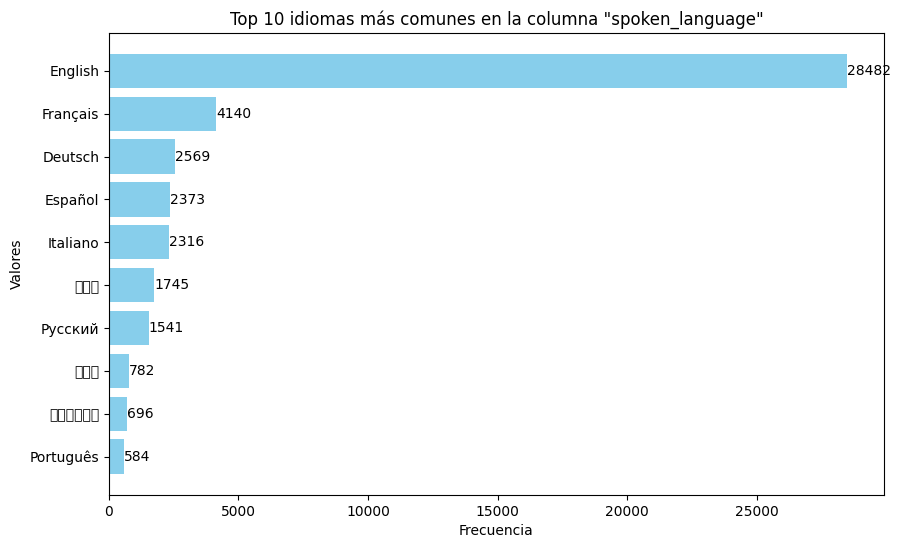

In [36]:
flat_lang = [item for sublist in st_recom['spoken_languages'] for item in sublist]
lang_count = Counter(flat_lang)

comm_sp_lan = lang_count.most_common(10)
labels, values = zip(*comm_sp_lan)

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color='skyblue')

for bar, value in zip(bars, values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, str(value), va='center')

plt.xlabel('Frecuencia')
plt.ylabel('Valores')
plt.title('Top 10 idiomas más comunes en la columna "spoken_language"')
plt.gca().invert_yaxis()

- Se decide que gracias al avance e implementación de la tecnología en los reproductores de las plataformas, se pueden ingresar subtitulos a cualquier entrega de las producciones de nuestro dataset, derribando y ampliando las barreras de visibilización de producciones que independientemente del idioma hablado, tienen una trama y una producción que ayudará a nuestro modelo de recomendación, por lo cual, se procederá a eliminar estas columnas.


In [37]:
st_recom.drop('spoken_languages', axis=1, inplace=True)
st_recom.drop('original_language', axis=1, inplace=True)

- Basado en la premisa anterior, la columna popularity para propósito del modelo de recomendación, se eliminará de este modelo.

In [38]:
st_recom.drop('popularity', axis=1, inplace=True)

- El conteo de los votos o 'vote_count' como columna es uno de los elementos con los que se calcula la columna 'vote_average', por lo cual sencillamente se descarta la columna 

In [39]:
st_recom.drop('vote_count', axis=1, inplace=True)
st_recom.drop('id', axis=1, inplace=True)

In [40]:
st_recom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44667 entries, 0 to 45023
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  44667 non-null  object        
 1   genres                 44667 non-null  object        
 2   overview               44667 non-null  object        
 3   production_companies   44667 non-null  object        
 4   production_countries   44667 non-null  object        
 5   release_date           44667 non-null  datetime64[ns]
 6   runtime                44667 non-null  int64         
 7   title                  44667 non-null  object        
 8   vote_average           44667 non-null  float64       
 9   release_year           44667 non-null  int64         
 10  cast                   44667 non-null  object        
 11  crew                   44667 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usag

- La columna de 'release_date' no tiene relevancia por temporada al momento de realizar un modelo de recomendación, en caso tal que se requiera una recomendación como una película navideña, se podría utilizar la columna de 'genres' para identificar las películas que se ajustan a la categoría de 'navideña' y realizar una recomendación basada en esa columna.

In [41]:
st_recom.drop('release_date', axis=1, inplace=True)

- Belongs_to_collection es una columna que contiene el título de la pelicula/serie dentro del dataset, sin embargo, en la serie de filas del dataset, tiene muy poca información como vemos a continuación, por eso se toma la decisión de eliminar esta columna

El 90.02% de de esta columna no contiene registros.


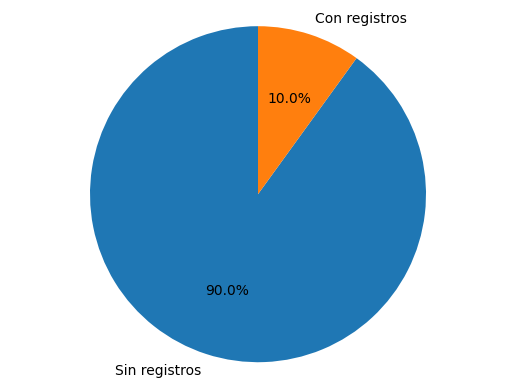

In [42]:
btocollect_gen_nul = st_recom['belongs_to_collection'].apply(lambda x: x == '').sum()
btocollect_gen_som = st_recom['belongs_to_collection'].apply(lambda x: x != '').sum()
tot = st_recom.shape[0]
labels = 'Sin registros', 'Con registros'
sizes = [btocollect_gen_nul, btocollect_gen_som]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

print(f'El {round((btocollect_gen_nul/tot)*100, 2)}% de de esta columna no contiene registros.')

In [43]:
st_recom.drop('belongs_to_collection', axis=1, inplace=True)

In [44]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
st_recom['overview'] = st_recom['overview'].apply(lambda x: x.replace(",","").replace("'",""))
st_recom['overview'] = st_recom['overview'].apply(lambda x: x.split())
st_recom['title_key'] = st_recom['title'].apply(lambda x: x.split())

- Si se desea realizar un análisis de sentimientos sobre un conjunto de reseñas de productos, almacenar las reseñas en formato str es adecuado para aplicar técnicas de procesamiento de lenguaje natural. Sin embargo, si se quiere analizar las calificaciones numéricas de los productos, convertirlas a tipo numérico permitirá realizar cálculos estadísticos como la media y la desviación estándar.

In [46]:
st_recom['genres'] = st_recom['genres'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
st_recom['overview'] = st_recom['overview'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
st_recom['overview'] = st_recom['overview'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
st_recom['production_companies'] = st_recom['production_companies'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
st_recom['production_countries'] = st_recom['production_countries'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
st_recom['title_key'] = st_recom['title_key'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
st_recom['title_key'] = st_recom['title_key'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
st_recom['cast'] = st_recom['cast'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
st_recom['crew'] = st_recom['crew'].apply(lambda x: ','.join(x) if len(x) > 0 else '')

In [47]:
regex_pattern = r'[^\u0000-\u007F]'

norom_titl = st_recom[st_recom['title_key'].str.contains(regex_pattern, regex=True)].index
normo_over = st_recom[st_recom['overview'].str.contains(regex_pattern, regex=True)].index
norom_genr = st_recom[st_recom['genres'].str.contains(regex_pattern, regex=True)].index
norom_comp = st_recom[st_recom['production_companies'].str.contains(regex_pattern, regex=True)].index
norom_count = st_recom[st_recom['production_countries'].str.contains(regex_pattern, regex=True)].index
norom_direc = st_recom[st_recom['crew'].str.contains(regex_pattern, regex=True)].index
norom_act = st_recom[st_recom['cast'].str.contains(regex_pattern, regex=True)].index
norom_tot = []

for elemento in norom_titl:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in normo_over:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in norom_genr:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in norom_comp:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in norom_count:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in norom_direc:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in norom_act:
    if elemento not in norom_tot:
        norom_tot.append(elemento)

print("Filas donde el titulo contiene caracteres no romanos:")
print(len(norom_titl))

print("Filas donde el resumen contiene caracteres no romanos:")
print(len(normo_over))

print("Filas donde los generos contienen caracteres no romanos:")
print(len(norom_genr))

print("Filas donde las companias productoras contienen caracteres no romanos:")
print(len(norom_comp))

print("Filas donde los paises productores contienen caracteres no romanos:")
print(len(norom_count))

print("Filas donde los directores contienen caracteres no romanos:")
print(len(norom_direc))

print("Filas donde los actores contienen caracteres no romanos:")
print(len(norom_act))

print("Filas totales que contienen caracteres no romanos:")
print(len(norom_tot))

Filas donde el titulo contiene caracteres no romanos:
737
Filas donde el resumen contiene caracteres no romanos:
4904
Filas donde los generos contienen caracteres no romanos:
0
Filas donde las companias productoras contienen caracteres no romanos:
2703
Filas donde los paises productores contienen caracteres no romanos:
0
Filas donde los directores contienen caracteres no romanos:
3162
Filas donde los actores contienen caracteres no romanos:
11647
Filas totales que contienen caracteres no romanos:
16030


In [48]:
st_recom.drop(norom_tot, inplace=True)

In [49]:
st_recom['release_year'] = (st_recom['release_year'] - st_recom['release_year'].min()) / (st_recom['release_year'].max() - st_recom['release_year'].min())
st_recom['runtime'] = (st_recom['runtime'] - st_recom['runtime'].min()) / (st_recom['runtime'].max() - st_recom['runtime'].min())

- Se decide eliminar espacios vacíos.

In [50]:
lis_genr = []
for i in st_recom['genres']:
    lis_genr.append(i.replace(" ",""))
st_recom['genres'] = lis_genr

lis_crew = []
for i in st_recom['crew']:
    lis_crew.append(i.replace(" ",""))
st_recom['crew'] = lis_crew

lis_cast = []
for i in st_recom['cast']:
    lis_cast.append(i.replace(" ",""))
st_recom['cast'] = lis_cast

lis_comp = []
for i in st_recom['production_companies']:
    lis_comp.append(i.replace(" ",""))
st_recom['production_companies'] = lis_comp

lis_count = []
for i in st_recom['production_countries']:
    lis_count.append(i.replace(" ",""))
st_recom['production_countries'] = lis_count

Se identifica durante el testo de la función, un incremento del consumo de memoria al usar la columna 'release_year' y 'run_time', este último como un dato dentro de las filas del dataset y con finalidad de un sistema de recomendación como algo innecesario durante el cálculo de la similitud del coseno, por lo cual se procede a eliminar estas columnas del modelo de recomendación.

In [51]:
st_recom.drop('release_year', axis=1, inplace=True)
st_recom.drop('runtime', axis=1, inplace=True)

Finalmente se llegó a una solución satisfactoria que permite dar luz verde a la exportación de un dataframe que puede ser usado para el requerido modelo de recomendación y se procede a exportar el archivo a formato .parquet

In [52]:
parquet_filename = 'streaming_ML.parquet'
table = pa.Table.from_pandas(st_recom)
pq.write_table(table, parquet_filename)

In [53]:
st_recom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28637 entries, 0 to 45022
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                28637 non-null  object 
 1   overview              28637 non-null  object 
 2   production_companies  28637 non-null  object 
 3   production_countries  28637 non-null  object 
 4   title                 28637 non-null  object 
 5   vote_average          28637 non-null  float64
 6   cast                  28637 non-null  object 
 7   crew                  28637 non-null  object 
 8   title_key             28637 non-null  object 
dtypes: float64(1), object(8)
memory usage: 2.2+ MB
